# GRIP TASK

# EXPLORATORY DATA ANALYSIS-SPORTS

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the datasets

In [2]:
match = pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [3]:
match.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Since there are 637 missing enteries in umpire 3 coloumn, we will drop it

In [7]:
match =match.drop(columns=['umpire3'], axis=1) 

In [9]:
delivery.isnull().sum() #finding no of null values in delivery datadet

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

There are large number of null values in player_dismissed, dismissal_kind and fielder coloumn as they are specific to wicket deliveries

In [10]:
wins=match[['id','season','winner']]
wins

,id,season,winner
0,1,2017,Sunrisers Hyderabad
1,2,2017,Rising Pune Supergiant
2,3,2017,Kolkata Knight Riders
3,4,2017,Kings XI Punjab
4,5,2017,Royal Challengers Bangalore
...,...,...,...
751,11347,2019,Mumbai Indians
752,11412,2019,Mumbai Indians
753,11413,2019,Delhi Capitals
754,11414,2019,Chennai Super Kings


In [11]:
combined = delivery.merge(wins,how='inner',left_on='match_id',right_on='id')

In [12]:
combined=combined.drop(columns=['id'],axis=1)

In [13]:
combined

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,2017,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,1,0,1,NaN,NaN,NaN,2019,Mumbai Indians
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,2,0,2,NaN,NaN,NaN,2019,Mumbai Indians
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,1,0,1,SR Watson,run out,KH Pandya,2019,Mumbai Indians
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,2,0,2,NaN,NaN,NaN,2019,Mumbai Indians


In [14]:
wins_per_team=match['winner'].value_counts()

In [15]:
wins_per_team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

from here it can be interpretated that there is spelling error in the name of of one team

In [16]:
match=match.replace("Rising Pune Supergiant","Rising Pune Supergiants")
combined=combined.replace("Rising Pune Supergiant","Rising Pune Supergiants")
delivery=delivery.replace("Rising Pune Supergiant","Rising Pune Supergiants")


# 1.Team wise Analysis

In [17]:
wins_per_team=match['winner'].value_counts()

In [18]:
wins_per_team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

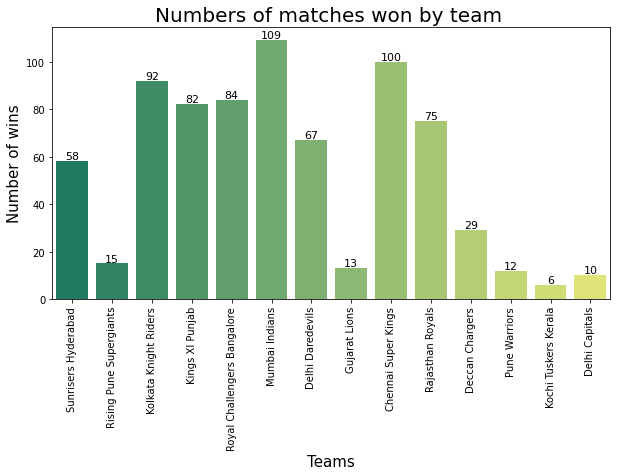

In [19]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x='winner',data=match, palette='summer')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("Number of wins",fontsize=15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

It can be interpretated that Mumbai Indians(109) has been the most successful team in the history of IPL followed by Chennai Super Kings(100).

In [20]:
winner=match.drop_duplicates(subset=['season'], keep='last')
winner[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [21]:
winner['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

It can be interpretated that Mumbai Indians has won the maximum number of titles followed by Chennai Super Kings

In [22]:
match['Won_by_batting_first']=np.where(match['win_by_runs']>0,'Won','Lose')

# 2. Number of Wins Based on Batting First

In [23]:
wins_bat_first=match['Won_by_batting_first'].value_counts()

In [24]:
wins_bat_first

Lose    419
Won     337
Name: Won_by_batting_first, dtype: int64

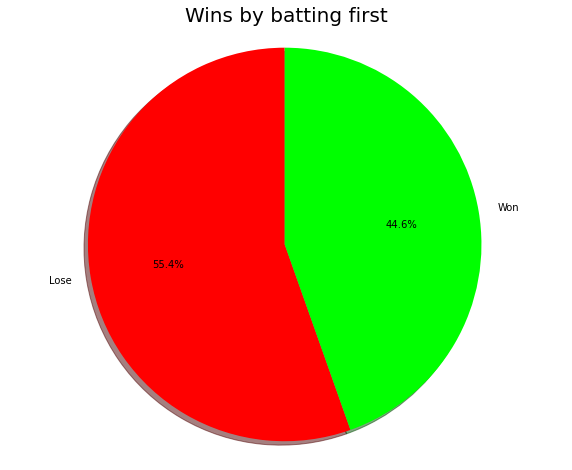

In [25]:
labels1=np.array(wins_bat_first.index)
sizes1 = wins_bat_first.values
colors = ['#FF0000', '#00FF00']
plt.figure(figsize = (10,8))
plt.pie(sizes1, labels=labels1, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Wins by batting first',fontsize=20)
plt.axis('equal')
plt.show()

It can be interpretated that team bowling first has slightly better chances than the team batting first

In [26]:
winsbybattingFirst = match.groupby("winner")["Won_by_batting_first"].value_counts()
winsbybattingFirst

winner                       Won_by_batting_first
Chennai Super Kings          Won                     52
                             Lose                    48
Deccan Chargers              Won                     18
                             Lose                    11
Delhi Capitals               Lose                     7
                             Won                      3
Delhi Daredevils             Lose                    42
                             Won                     25
Gujarat Lions                Lose                    12
                             Won                      1
Kings XI Punjab              Lose                    44
                             Won                     38
Kochi Tuskers Kerala         Lose                     4
                             Won                      2
Kolkata Knight Riders        Lose                    56
                             Won                     36
Mumbai Indians               Won                     5

C:\Users\Naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


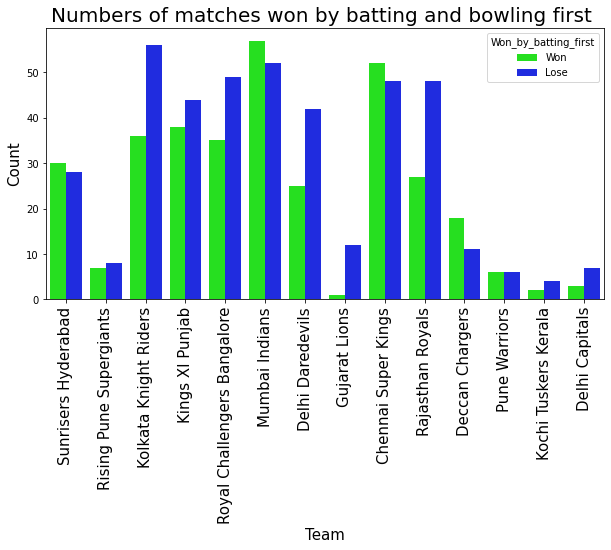

In [27]:
plt.figure(figsize = (10,5))
sns.countplot('winner',hue='Won_by_batting_first',data=match,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()


Although it was interpretated that team bowling first has won more matches, but from the above plot it can be seen that most successful teams like MUMBAI INDIANS and CHENNAI SUPER KINGS have won more matches by batting first.

# 3. Number of Wins Based on Toss

In [28]:
match['match_won_by_winning_toss']=np.where(match['winner']==match['toss_winner'],'1','0')

In [29]:
match_won_by_winning__toss=match['match_won_by_winning_toss'].value_counts()
match_won_by_winning__toss

1    393
0    363
Name: match_won_by_winning_toss, dtype: int64

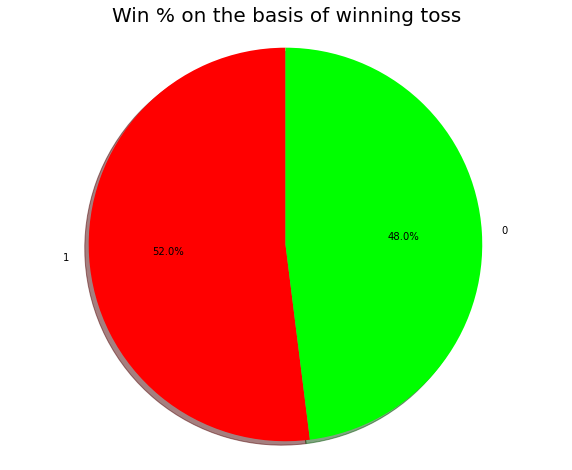

In [54]:
labels2=np.array(match_won_by_winning__toss.index)
sizes2 = match_won_by_winning__toss.values
colors = ['#FF0000', '#00FF00']
plt.figure(figsize = (10,8))
plt.pie(sizes2, labels=labels2, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Win % on the basis of winning toss',fontsize=20)
plt.axis('equal')
plt.show()

# Team wise analysis of number of wins based on winning toss

In [31]:
winsbyWinningToss = match.groupby("winner")["match_won_by_winning_toss"].value_counts()
winsbyWinningToss

winner                       match_won_by_winning_toss
Chennai Super Kings          1                            57
                             0                            43
Deccan Chargers              1                            19
                             0                            10
Delhi Capitals               1                             7
                             0                             3
Delhi Daredevils             1                            35
                             0                            32
Gujarat Lions                1                            10
                             0                             3
Kings XI Punjab              0                            47
                             1                            35
Kochi Tuskers Kerala         1                             4
                             0                             2
Kolkata Knight Riders        1                            53
                             0

C:\Users\Naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


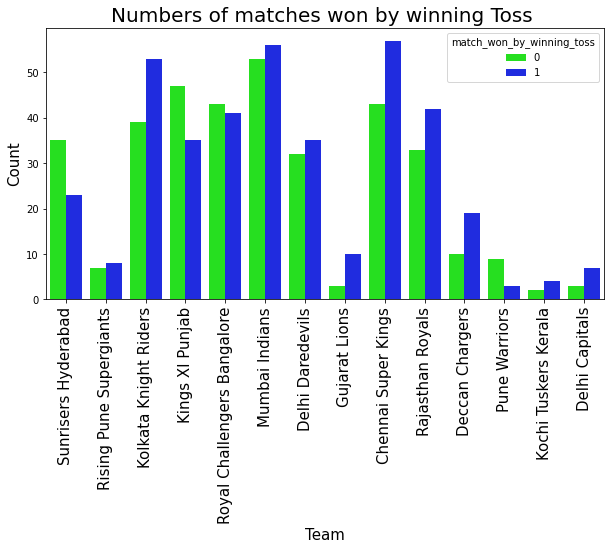

In [32]:
plt.figure(figsize = (10,5))
sns.countplot('winner',hue='match_won_by_winning_toss',data=match,palette='hsv')
plt.title("Numbers of matches won by winning Toss ",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# Season wise analysis of number of wins based on winning toss

In [33]:
winsbyWinningToss_season = match.groupby("season")["match_won_by_winning_toss"].value_counts()
winsbyWinningToss_season

season  match_won_by_winning_toss
2008    0                            30
        1                            28
2009    1                            33
        0                            24
2010    1                            31
        0                            29
2011    1                            38
        0                            35
2012    0                            41
        1                            33
2013    0                            40
        1                            36
2014    0                            30
        1                            30
2015    0                            31
        1                            28
2016    1                            34
        0                            26
2017    1                            34
        0                            25
2018    1                            32
        0                            28
2019    1                            36
        0                            24
Name: 

C:\Users\Naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


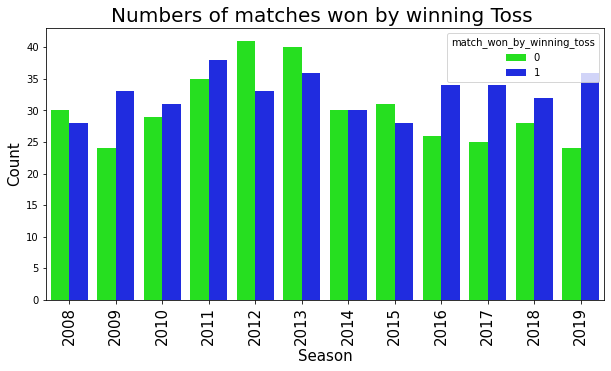

In [34]:
plt.figure(figsize = (10,5))
sns.countplot('season',hue='match_won_by_winning_toss',data=match,palette='hsv')
plt.title("Numbers of matches won by winning Toss ",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# 4. Analysis of Toss Decisions

In [35]:
toss_decisions=match['toss_decision'].value_counts()
toss_decisions

field    463
bat      293
Name: toss_decision, dtype: int64

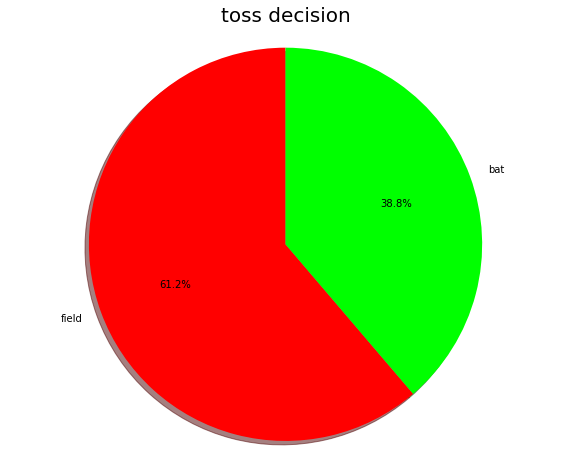

In [53]:
labels3=np.array(toss_decisions.index)
sizes3 = toss_decisions.values
colors = ['#FF0000', '#00FF00']
plt.figure(figsize = (10,8))
plt.pie(sizes3, labels=labels3, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('toss decision',fontsize=20)
plt.axis('equal')
plt.show()

In [37]:
tossDecision_season = match.groupby("season")["toss_decision"].value_counts()
tossDecision_season

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
Name: toss_decision, dtype: int64

C:\Users\Naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


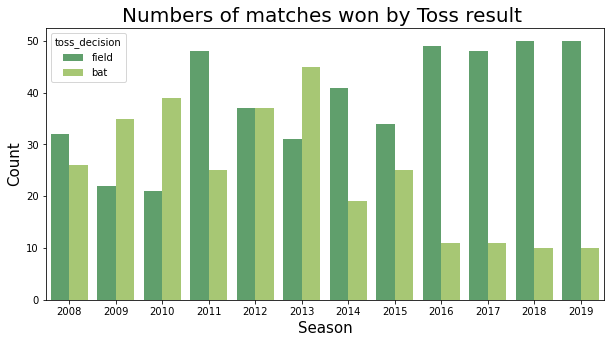

In [38]:
plt.figure(figsize = (10,5))
sns.countplot('season',hue='toss_decision',data=match,palette='summer')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

 it can be interpretated that the teams choosing to field first after winning toss have won more matches

# Player Analysis

In [39]:
MoM=match['player_of_match'].value_counts().head(10)

In [40]:
MoM

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

It can be seen that Chris Gayle followed by MS Dhoni has won maximum number of MoM awards and most of the players who have won MoM are batsmen

In [41]:
winner[['player_of_match','season']].reset_index(drop=True).sort_values('season')

,player_of_match,season
1,YK Pathan,2008
2,A Kumble,2009
3,SK Raina,2010
4,M Vijay,2011
5,MS Bisla,2012
6,KA Pollard,2013
7,MK Pandey,2014
8,RG Sharma,2015
9,BCJ Cutting,2016
0,KH Pandya,2017


# Batsmen Analysis

In [42]:
score=delivery.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
score=score.rename(columns={'sum':'batsman_runs'})
score.iloc[:10,:]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [43]:
fours=delivery[delivery['batsman_runs']==4]
fours=fours['batsman'].value_counts().sort_values(ascending=False)
fours.head(10)

S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman, dtype: int64

In [44]:
sixes=delivery[delivery['batsman_runs']==6]
sixes=sixes['batsman'].value_counts().sort_values(ascending=False)
sixes.head(10)

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman, dtype: int64

# Bowlers Analysis

In [45]:
dismissal=delivery.dropna(subset=['player_dismissed'])

In [46]:

wicket =dismissal['bowler'].value_counts().rename_axis('bowler').reset_index(name='wickets')
wicket.head(10)


,bowler,wickets
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


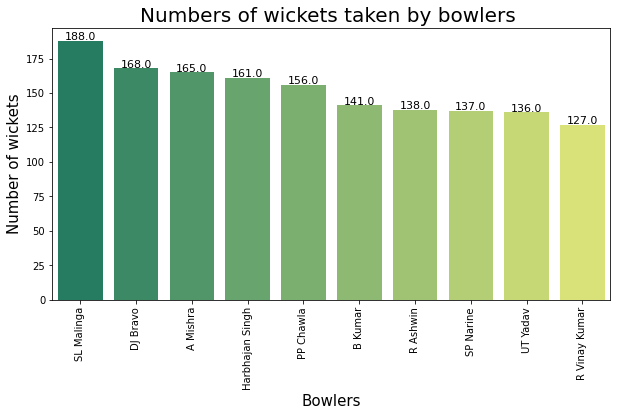

In [47]:
plt.figure(figsize = (10,5))
ax=sns.barplot(x='bowler',y='wickets',data=wicket[:10], palette='summer')
plt.title("Numbers of wickets taken by bowlers ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Bowlers",fontsize=15)
plt.ylabel("Number of wickets",fontsize=15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

# Fielder Analysis

In [48]:
fielder=delivery.dropna(subset=['fielder'])

In [49]:
fielder =fielder['fielder'].value_counts().rename_axis('fielder').reset_index(name='dismissals')
fielder.head(10)

,fielder,dismissals
0,MS Dhoni,159
1,KD Karthik,152
2,RV Uthappa,125
3,SK Raina,115
4,AB de Villiers,114
5,PA Patel,97
6,RG Sharma,92
7,V Kohli,90
8,KA Pollard,85
9,NV Ojha,82


In [50]:
catches=delivery[delivery['dismissal_kind']=='caught']

In [51]:
catches =catches['fielder'].value_counts().rename_axis('fielder').reset_index(name='catches')
catches.head(10)

,fielder,catches
0,KD Karthik,109
1,SK Raina,99
2,MS Dhoni,98
3,AB de Villiers,93
4,RV Uthappa,84
5,RG Sharma,82
6,KA Pollard,76
7,V Kohli,73
8,PA Patel,69
9,S Dhawan,68


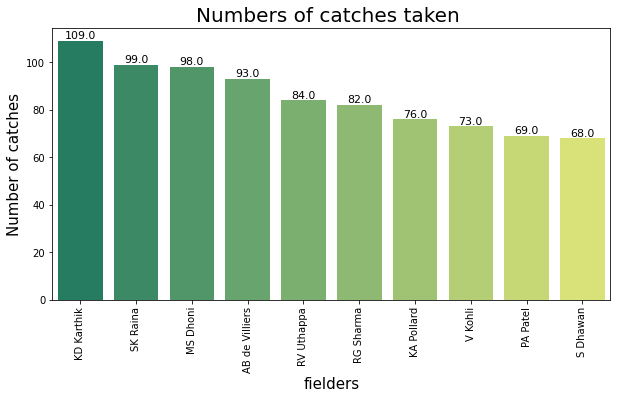

In [52]:
plt.figure(figsize = (10,5))
ax=sns.barplot(x='fielder',y='catches',data=catches[:10], palette='summer')
plt.title("Numbers of catches taken ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("fielders",fontsize=15)
plt.ylabel("Number of catches",fontsize=15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

# CONCLUSIONS:

1. It can be interpretated that Mumbai Indians(109) has been the most successful team in the history of IPL followed by Chennai    Super Kings(100).
2. It can be interpretated that Mumbai Indians has won the maximum number of titles followed by Chennai Super Kings.
3. It can be interpretated that team bowling first has slightly better chances than the team batting first.
4. Although it was interpretated that team bowling first has won more matches, but from the above plot it can be seen that most    successful teams like MUMBAI INDIANS and CHENNAI SUPER KINGS have won more matches by batting first.
5. It can be seen that Chris Gayle followed by MS Dhoni has won maximum number of MoM awards and most of the players who hav0e    won MoM are batsmen.
6. Top leading run scorer are Virat kholi, SK Raina, RG Sharma.
7. Most number of fours are hit by S Dhawan and sixes by Chris Gayle.
8. Top leading wicket takers are  L. Malinga, DJ Bravo and A Mishra
